In [44]:
#importing all required libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tabulate import tabulate


In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
# Generate synthetic data from Gaussian distributions
np.random.seed(42)  # for reproducibility
true_means = [0.0, 5.0]
true_std_devs = [1.0, 1.0]
true_weights = [0.6, 0.4]
sample_size = 100
component_samples = np.random.choice(len(true_means), size=sample_size, p=true_weights)
data = np.array([np.random.normal(true_means[i], true_std_devs[i]) for i in component_samples])


In [47]:
# Prior distribution parameters (Weibull priors)
num_samples = 10000
shape_parameter = 1.5

In [48]:
def likelihood(data, means, std_devs, weights):
    pdf_values = np.array([stats.norm.pdf(data, loc=mu, scale=std) for mu, std in zip(means, std_devs)])
    weighted_pdf = np.dot(weights, pdf_values)
    return np.prod(weighted_pdf)

In [49]:
# Simple Monte Carlo approach to estimate the posterior distribution
mean_samples = np.random.weibull(shape_parameter, size=(num_samples, len(true_means)))
std_dev_samples = np.random.weibull(shape_parameter, size=(num_samples, len(true_std_devs)))
weights_samples = np.random.weibull(shape_parameter, size=(num_samples, len(true_weights)))

# Transform samples to fit the parameters of the problem
mean_samples = np.exp(mean_samples)  # Ensure mean_samples are positive
std_dev_samples = np.exp(std_dev_samples)  # Ensure std_dev_samples are positive
weights_samples = weights_samples / np.sum(weights_samples, axis=1)[:, None]  # Normalize weights

likelihoods = np.array([likelihood(data, mean_samples[i], std_dev_samples[i], weights_samples[i]) for i in range(num_samples)])


In [50]:
# Normalize likelihoods to obtain unnormalized posterior
posterior = likelihoods / np.sum(likelihoods)

# Sample from the unnormalized posterior
samples = np.random.choice(np.arange(num_samples), size=1000, replace=True, p=posterior)

# Extract samples of means, standard deviations, and weights
mean_samples = mean_samples[samples]
std_dev_samples = std_dev_samples[samples]
weights_samples = weights_samples[samples]


In [51]:
# Calculate credible intervals for multiple confidence levels
credible_interval_means_99 = np.percentile(mean_samples, [0.5, 99.5], axis=0)
credible_interval_means_95 = np.percentile(mean_samples, [2.5, 97.5], axis=0)
credible_interval_means_90 = np.percentile(mean_samples, [5, 95], axis=0)
credible_interval_means_75 = np.percentile(mean_samples, [12.5, 87.5], axis=0)

credible_interval_std_devs_99 = np.percentile(std_dev_samples, [0.5, 99.5], axis=0)
credible_interval_std_devs_95 = np.percentile(std_dev_samples, [2.5, 97.5], axis=0)
credible_interval_std_devs_90 = np.percentile(std_dev_samples, [5, 95], axis=0)
credible_interval_std_devs_75 = np.percentile(std_dev_samples, [12.5, 87.5], axis=0)

credible_interval_weights_99 = np.percentile(weights_samples, [0.5, 99.5], axis=0)
credible_interval_weights_95 = np.percentile(weights_samples, [2.5, 97.5], axis=0)
credible_interval_weights_90 = np.percentile(weights_samples, [5, 95], axis=0)
credible_interval_weights_75 = np.percentile(weights_samples, [12.5, 87.5], axis=0)


In [52]:
data = [
    ['99% Credible Interval'] + [f'{interval[0]:.4f} - {interval[1]:.4f}' for interval in credible_interval_means_99] +
    [f'{interval[0]:.4f} - {interval[1]:.4f}' for interval in credible_interval_std_devs_99] +
    [f'{interval[0]:.4f} - {interval[1]:.4f}' for interval in credible_interval_weights_99],
    ['95% Credible Interval'] + [f'{interval[0]:.4f} - {interval[1]:.4f}' for interval in credible_interval_means_95] +
    [f'{interval[0]:.4f} - {interval[1]:.4f}' for interval in credible_interval_std_devs_95] +
    [f'{interval[0]:.4f} - {interval[1]:.4f}' for interval in credible_interval_weights_95],
    ['90% Credible Interval'] + [f'{interval[0]:.4f} - {interval[1]:.4f}' for interval in credible_interval_means_90] +
    [f'{interval[0]:.4f} - {interval[1]:.4f}' for interval in credible_interval_std_devs_90] +
    [f'{interval[0]:.4f} - {interval[1]:.4f}' for interval in credible_interval_weights_90],
    ['75% Credible Interval'] + [f'{interval[0]:.4f} - {interval[1]:.4f}' for interval in credible_interval_means_75] +
    [f'{interval[0]:.4f} - {interval[1]:.4f}' for interval in credible_interval_std_devs_75] +
    [f'{interval[0]:.4f} - {interval[1]:.4f}' for interval in credible_interval_weights_75]
]

headers = ["Interval/Parameter"] + \
          [f"Mean {i+1}" for i in range(len(true_means))] + \
          [f"Std Dev {i+1}" for i in range(len(true_std_devs))] + \
          [f"Weight {i+1}" for i in range(len(true_weights))]

print(tabulate(data, headers=headers))

Interval/Parameter     Mean 1           Mean 2           Std Dev 1        Std Dev 2        Weight 1         Weight 2
---------------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------
99% Credible Interval  1.0046 - 1.0039  5.0093 - 5.2612  1.2161 - 1.1942  1.8918 - 2.0115  0.2347 - 0.3186  0.6814 - 0.7653
95% Credible Interval  1.1154 - 1.0039  5.0093 - 4.9321  1.2161 - 1.2545  1.5640 - 1.9980  0.2347 - 0.4504  0.5496 - 0.7653
90% Credible Interval  1.1154 - 1.0642  5.0093 - 4.8630  1.2161 - 1.2545  1.5640 - 1.9980  0.3031 - 0.4504  0.5496 - 0.6969
75% Credible Interval  4.5476 - 1.0642  5.0093 - 1.1655  1.2540 - 1.4229  1.3968 - 1.9980  0.3031 - 0.6432  0.3568 - 0.6969


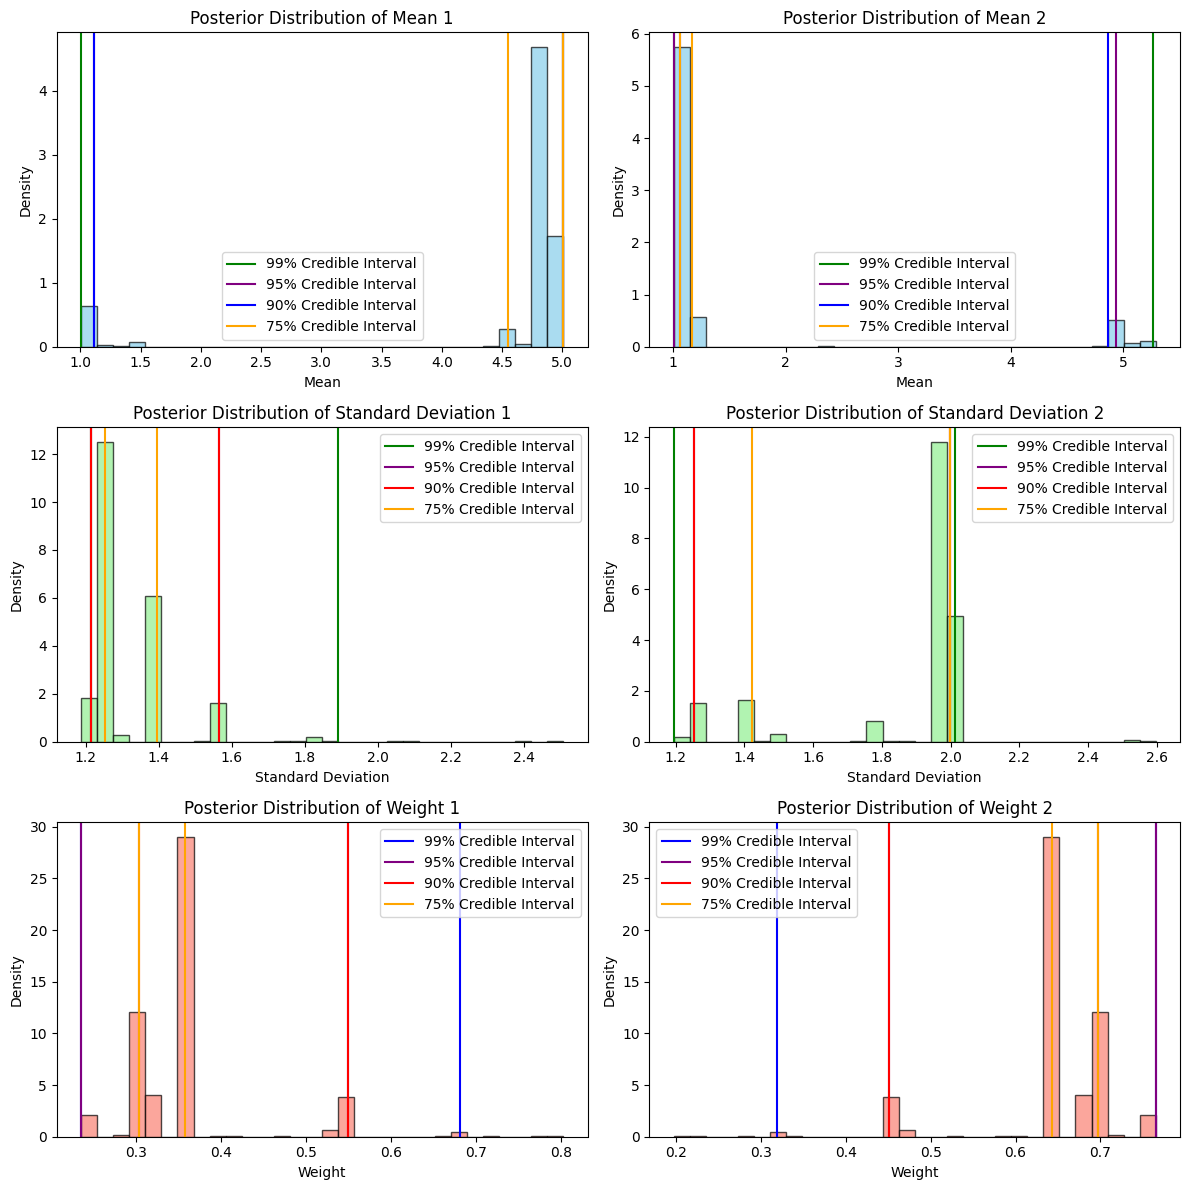

In [53]:
# Plot histograms of posterior samples and credible intervals
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Histograms of posterior samples for means
for i in range(len(true_means)):
    axs[0, i].hist(mean_samples[:, i], bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)
    axs[0, i].axvline(x=credible_interval_means_99[0][i], color='green', linestyle='-', label='99% Credible Interval')
    axs[0, i].axvline(x=credible_interval_means_99[1][i], color='green', linestyle='-')
    axs[0, i].axvline(x=credible_interval_means_95[0][i], color='purple', linestyle='-', label='95% Credible Interval')
    axs[0, i].axvline(x=credible_interval_means_95[1][i], color='purple', linestyle='-')
    axs[0, i].axvline(x=credible_interval_means_90[0][i], color='blue', linestyle='-', label='90% Credible Interval')
    axs[0, i].axvline(x=credible_interval_means_90[1][i], color='blue', linestyle='-')
    axs[0, i].axvline(x=credible_interval_means_75[0][i], color='orange', linestyle='-', label='75% Credible Interval')
    axs[0, i].axvline(x=credible_interval_means_75[1][i], color='orange', linestyle='-')
    axs[0, i].set_title(f"Posterior Distribution of Mean {i+1}")
    axs[0, i].set_xlabel('Mean')
    axs[0, i].set_ylabel('Density')
    axs[0, i].legend()

# Histograms of posterior samples for standard deviations
for i in range(len(true_std_devs)):
    axs[1, i].hist(std_dev_samples[:, i], bins=30, density=True, color='lightgreen', edgecolor='black', alpha=0.7)
    axs[1, i].axvline(x=credible_interval_std_devs_99[0][i], color='green', linestyle='-', label='99% Credible Interval')
    axs[1, i].axvline(x=credible_interval_std_devs_99[1][i], color='green', linestyle='-')
    axs[1, i].axvline(x=credible_interval_std_devs_95[0][i], color='purple', linestyle='-', label='95% Credible Interval')
    axs[1, i].axvline(x=credible_interval_std_devs_95[1][i], color='purple', linestyle='-')
    axs[1, i].axvline(x=credible_interval_std_devs_90[0][i], color='red', linestyle='-', label='90% Credible Interval')
    axs[1, i].axvline(x=credible_interval_std_devs_90[1][i], color='red', linestyle='-')
    axs[1, i].axvline(x=credible_interval_std_devs_75[0][i], color='orange', linestyle='-', label='75% Credible Interval')
    axs[1, i].axvline(x=credible_interval_std_devs_75[1][i], color='orange', linestyle='-')
    axs[1, i].set_title(f"Posterior Distribution of Standard Deviation {i+1}")
    axs[1, i].set_xlabel('Standard Deviation')
    axs[1, i].set_ylabel('Density')
    axs[1, i].legend()

# Histograms of posterior samples for weights
for i in range(len(true_weights)):
    axs[2, i].hist(weights_samples[:, i], bins=30, density=True, color='salmon', edgecolor='black', alpha=0.7)
    axs[2, i].axvline(x=credible_interval_weights_99[0][i], color='blue', linestyle='-', label='99% Credible Interval')
    axs[2, i].axvline(x=credible_interval_weights_99[1][i], color='blue', linestyle='-')
    axs[2, i].axvline(x=credible_interval_weights_95[0][i], color='purple', linestyle='-', label='95% Credible Interval')
    axs[2, i].axvline(x=credible_interval_weights_95[1][i], color='purple', linestyle='-')
    axs[2, i].axvline(x=credible_interval_weights_90[0][i], color='red', linestyle='-', label='90% Credible Interval')
    axs[2, i].axvline(x=credible_interval_weights_90[1][i], color='red', linestyle='-')
    axs[2, i].axvline(x=credible_interval_weights_75[0][i], color='orange', linestyle='-', label='75% Credible Interval')
    axs[2, i].axvline(x=credible_interval_weights_75[1][i], color='orange', linestyle='-')
    axs[2, i].set_title(f"Posterior Distribution of Weight {i+1}")
    axs[2, i].set_xlabel('Weight')
    axs[2, i].set_ylabel('Density')
    axs[2, i].legend()

plt.tight_layout()
plt.show()

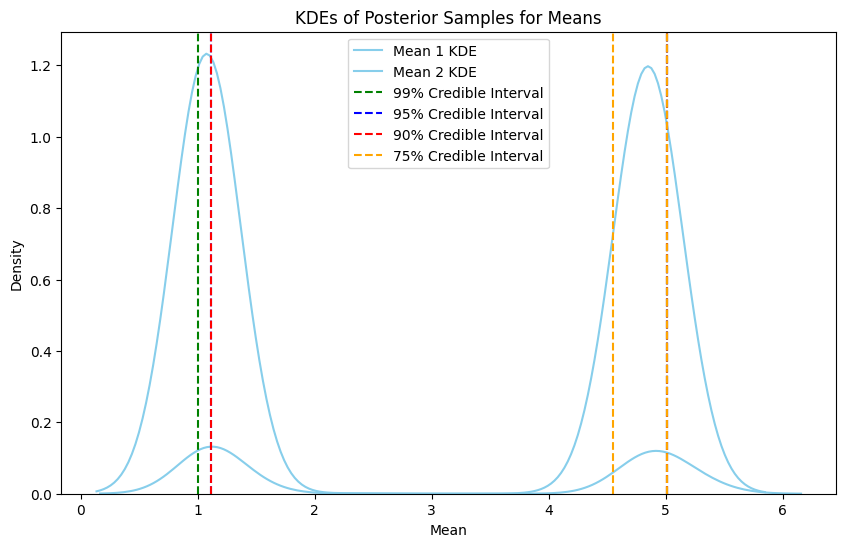

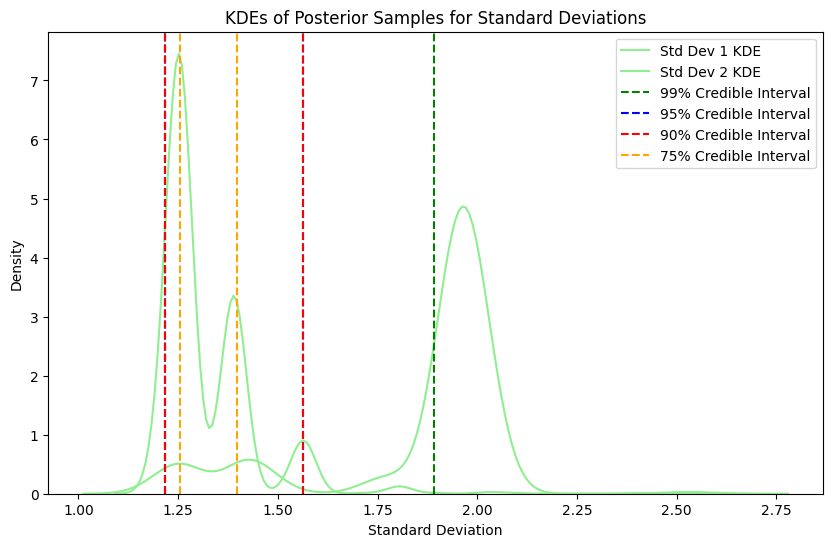

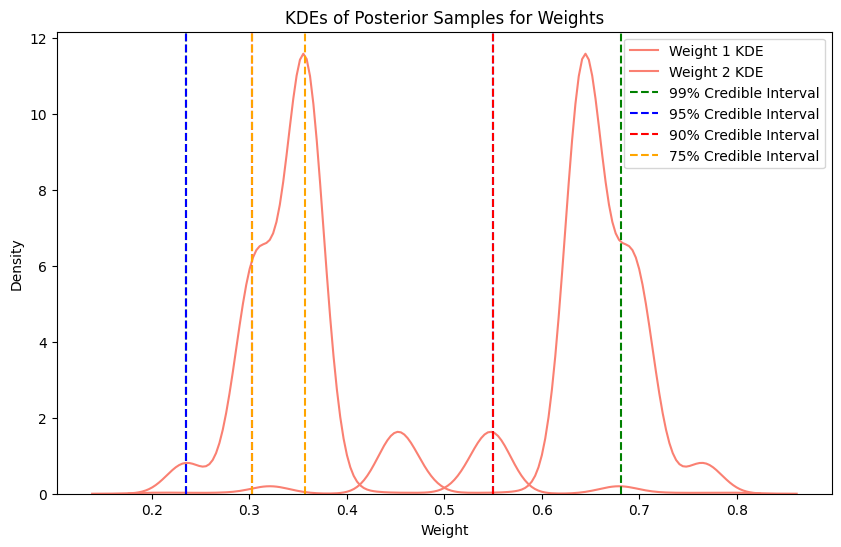

In [54]:
#Now we will plot the KDE and find the credible intervals from there

# Plot KDEs of posterior samples for means
plt.figure(figsize=(10, 6))
for i in range(len(true_means)):
    sns.kdeplot(mean_samples[:, i], color='skyblue', label=f"Mean {i+1} KDE")
plt.axvline(x=credible_interval_means_99[0][0], color='green', linestyle='--', label='99% Credible Interval')
plt.axvline(x=credible_interval_means_99[1][0], color='green', linestyle='--')
plt.axvline(x=credible_interval_means_95[0][0], color='blue', linestyle='--', label='95% Credible Interval')
plt.axvline(x=credible_interval_means_95[1][0], color='blue', linestyle='--')
plt.axvline(x=credible_interval_means_90[0][0], color='red', linestyle='--', label='90% Credible Interval')
plt.axvline(x=credible_interval_means_90[1][0], color='red', linestyle='--')
plt.axvline(x=credible_interval_means_75[0][0], color='orange', linestyle='--', label='75% Credible Interval')
plt.axvline(x=credible_interval_means_75[1][0], color='orange', linestyle='--')
plt.title('KDEs of Posterior Samples for Means')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plot KDEs of posterior samples for standard deviations
plt.figure(figsize=(10, 6))
for i in range(len(true_std_devs)):
    sns.kdeplot(std_dev_samples[:, i], color='lightgreen', label=f"Std Dev {i+1} KDE")
plt.axvline(x=credible_interval_std_devs_99[0][0], color='green', linestyle='--', label='99% Credible Interval')
plt.axvline(x=credible_interval_std_devs_99[1][0], color='green', linestyle='--')
plt.axvline(x=credible_interval_std_devs_95[0][0], color='blue', linestyle='--', label='95% Credible Interval')
plt.axvline(x=credible_interval_std_devs_95[1][0], color='blue', linestyle='--')
plt.axvline(x=credible_interval_std_devs_90[0][0], color='red', linestyle='--', label='90% Credible Interval')
plt.axvline(x=credible_interval_std_devs_90[1][0], color='red', linestyle='--')
plt.axvline(x=credible_interval_std_devs_75[0][0], color='orange', linestyle='--', label='75% Credible Interval')
plt.axvline(x=credible_interval_std_devs_75[1][0], color='orange', linestyle='--')
plt.title('KDEs of Posterior Samples for Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plot KDEs of posterior samples for weights
plt.figure(figsize=(10, 6))
for i in range(len(true_weights)):
    sns.kdeplot(weights_samples[:, i], color='salmon', label=f"Weight {i+1} KDE")
plt.axvline(x=credible_interval_weights_99[0][0], color='green', linestyle='--', label='99% Credible Interval')
plt.axvline(x=credible_interval_weights_99[1][0], color='green', linestyle='--')
plt.axvline(x=credible_interval_weights_95[0][0], color='blue', linestyle='--', label='95% Credible Interval')
plt.axvline(x=credible_interval_weights_95[1][0], color='blue', linestyle='--')
plt.axvline(x=credible_interval_weights_90[0][0], color='red', linestyle='--', label='90% Credible Interval')
plt.axvline(x=credible_interval_weights_90[1][0], color='red', linestyle='--')
plt.axvline(x=credible_interval_weights_75[0][0], color='orange', linestyle='--', label='75% Credible Interval')
plt.axvline(x=credible_interval_weights_75[1][0], color='orange', linestyle='--')
plt.title('KDEs of Posterior Samples for Weights')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.legend()
plt.show()


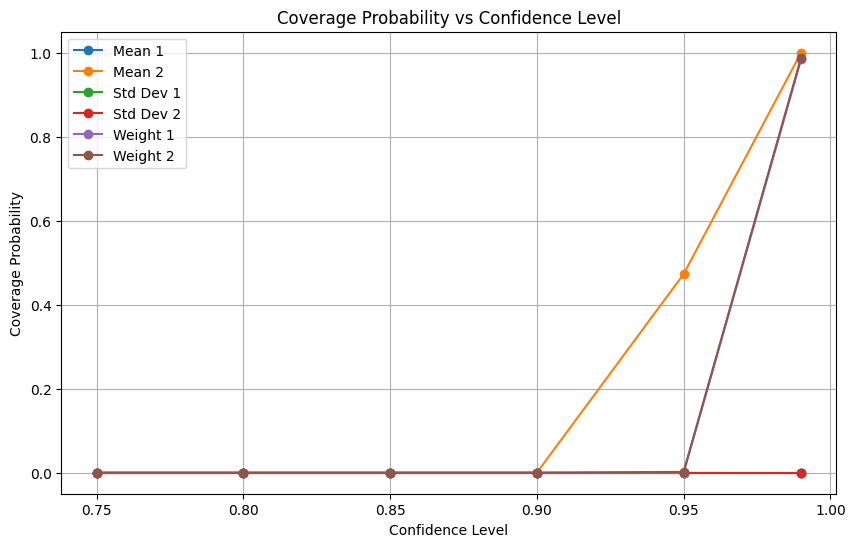

In [55]:
def calculate_coverage_probability(parameter_samples, true_value, confidence_level=0.95, num_iterations=1000):
    count = 0
    sample_size = len(parameter_samples)
    for _ in range(num_iterations):
        resampled_indices = np.random.choice(range(sample_size), size=sample_size, replace=True)
        resampled_data = parameter_samples[resampled_indices]
        credible_interval = np.percentile(resampled_data, [(1-confidence_level)/2 * 100, (1+confidence_level)/2 * 100])
        if true_value >= credible_interval[0] and true_value <= credible_interval[1]:
            count += 1
    return count / num_iterations

# Define confidence levels
confidence_levels = [0.75, 0.80, 0.85, 0.90, 0.95, 0.99]

# Calculate coverage probabilities for different confidence levels
coverage_probabilities_means = []
coverage_probabilities_std_devs = []
coverage_probabilities_weights = []

for confidence_level in confidence_levels:
    coverage_prob_means = [calculate_coverage_probability(mean_samples[:, i], true_means[i], confidence_level) for i in range(len(true_means))]
    coverage_prob_std_devs = [calculate_coverage_probability(std_dev_samples[:, i], true_std_devs[i], confidence_level) for i in range(len(true_std_devs))]
    coverage_prob_weights = [calculate_coverage_probability(weights_samples[:, i], true_weights[i], confidence_level) for i in range(len(true_weights))]
    coverage_probabilities_means.append(coverage_prob_means)
    coverage_probabilities_std_devs.append(coverage_prob_std_devs)
    coverage_probabilities_weights.append(coverage_prob_weights)

# Plot coverage probabilities for different confidence levels
plt.figure(figsize=(10, 6))

for i in range(len(true_means)):
    plt.plot(confidence_levels, [prob[i] for prob in coverage_probabilities_means], marker='o', label=f"Mean {i+1}")

for i in range(len(true_std_devs)):
    plt.plot(confidence_levels, [prob[i] for prob in coverage_probabilities_std_devs], marker='o', label=f"Std Dev {i+1}")

for i in range(len(true_weights)):
    plt.plot(confidence_levels, [prob[i] for prob in coverage_probabilities_weights], marker='o', label=f"Weight {i+1}")

plt.xlabel('Confidence Level')
plt.ylabel('Coverage Probability')
plt.title('Coverage Probability vs Confidence Level')
plt.legend()
plt.grid(True)
plt.show()
